**Навигация по уроку**

1. [Простые нейронные сети. Знакомство с библиотекой Keras](https://colab.research.google.com/drive/16xfRAdyg-Re1bP2cyYpbpAALa6noUL3U)
2. [Распознание рукописных цифр (Практика)](https://colab.research.google.com/drive/1RaGkCutdIazFN5PtQOod5UH2Cc05diYI)
3. Домашняя работа

Используя датасет по рукописным буквам английского языка, обучите модель, оцените ее предсказательные способности. Используйте только полносвязанные слои. Поэкспериментируйте с числом слоев и числом нейронов в слое, добейтесь максимальной точности. Используйте куски кода и рекомендации из практической части урока. Нарисуйте графики точности и потерь для обучающей и тестовой выборки, сделайте по ним выводы.

Оценка за задание:
* 1 балл - задача решена с помощью куратора, точность на проверочной выборке ниже 85%
* 2 балла - задача решена с подсказками куратора, точность на проверочной выборке выше 85%
* 3 балла - задача решена самостоятельно, точность на проверочной выборке выше 85%
* 4 балла - задача решена самостоятельно, точность на проверочной выборке выше 93%
* 5 баллов - задача решена самостоятельно, точность на проверочной выборке выше 97%

In [ ]:
import numpy as np
dataset = np.loadtxt('https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv', delimiter=',')

In [ ]:
X = dataset[:,1:785]
Y = dataset[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [ ]:
import gc
del dataset, X, Y
gc.collect()

0

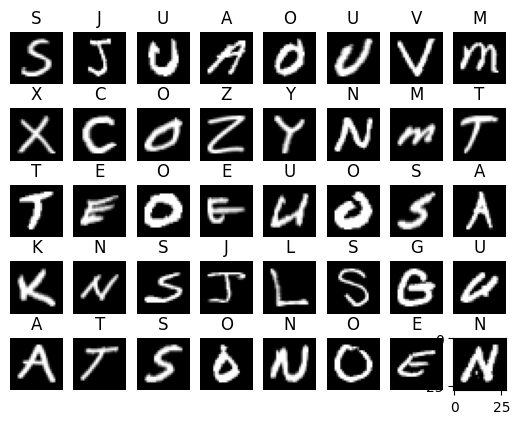

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

for i in range(40):
    x = x_train[i]
    x = x.reshape((28, 28))
    plt.axis('off')
    im = plt.subplot(5, 8, i+1)
    plt.title(word_dict.get(y_train[i]))
    im.imshow(x, cmap='gray')


In [ ]:
# Ваше решение

#Подготовка данных.
Если это вектор, то можем продолжать, если это матрица или тензор, то нужно будет ее преобразовать в одномерный вектор (для картинок) и нормализовать, а так же закодировать лэйблы в one-hot-encoded при необходимости.

In [ ]:
x_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   5.,  27.,  87., 134., 158., 171.,  97.,  17.,
         1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
x_train[0].shape

(784,)

In [ ]:
from keras.utils import to_categorical

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Преобразование меток классов в one-hot кодирование
y_train = to_categorical(y_train, num_classes=26)
y_test = to_categorical(y_test, num_classes=26)

In [ ]:
x_train.shape

(297960, 784)

In [ ]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
y_train.shape

(297960, 26)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0.])

#Устанавливаем библиотеки

In [ ]:
!pip install tensorflow keras

#Создаем модель сети


##Начнем создание модели
Модель содержит 2 плотных слоев по 64 и 32 нейронов и вывода из 26 нейронов с функцией активации softmax для классификации

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, Input, utils

In [ ]:
def build_model():
    model = models.Sequential()
    model.add(Input(shape=(28*28,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(26, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │             858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,178 (207.73 KB)

 Trainable params: 53,178 (207.73 KB)

 Non-trainable params: 0 (0.00 B)

##Проверяем модель

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

Epoch 1/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7986 - loss: 0.7572 - val_accuracy: 0.9284 - val_loss: 0.2597
Epoch 2/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9378 - loss: 0.2238 - val_accuracy: 0.9517 - val_loss: 0.1770
Epoch 3/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9537 - loss: 0.1697 - val_accuracy: 0.9572 - val_loss: 0.1573
Epoch 4/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9611 - loss: 0.1423 - val_accuracy: 0.9598 - val_loss: 0.1454
Epoch 5/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9662 - loss: 0.1234 - val_accuracy: 0.9640 - val_loss: 0.1321


##Смотрим график

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

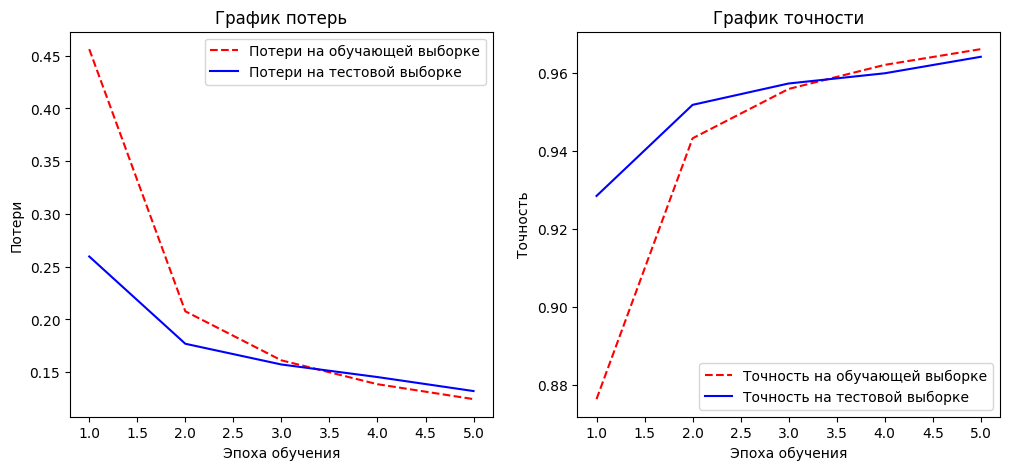

Лучшее значение потерь на обучающей выборке: 0.124 на эпохе 5
Лучшее значение валидационных потерь: 0.132 на эпохе 5
Лучшая точность на обучающей выборке: 96.601% на эпохе 5
Лучшая точность на валидационных данных: 96.405% на эпохе 5


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Получаем значения потерь и валидационных потерь
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(epochs, loss, '--', label='Потери на обучающей выборке', color='r')
ax[0].plot(epochs, val_loss, 'b', label='Потери на тестовой выборке')
ax[0].set_title('График потерь')
ax[0].set_xlabel('Эпоха обучения')
ax[0].set_ylabel('Потери')
ax[0].legend()

ax[1].plot(epochs, acc, '--', label='Точность на обучающей выборке', color='r')
ax[1].plot(epochs, val_acc, 'b', label='Точность на тестовой выборке')
ax[1].set_title('График точности')
ax[1].set_xlabel('Эпоха обучения')
ax[1].set_ylabel('Точность')
ax[1].legend()

plt.show()

# Находим лучшее значение потерь на обучающей выборке
best_loss = min(loss)
best_epoch_loss = loss.index(best_loss) + 1  # +1, чтобы учесть индексацию

# Находим лучшее значение валидационных потерь
best_val_loss = min(val_loss)
best_epoch_val_loss = val_loss.index(best_val_loss) + 1  # +1, чтобы учесть индексацию

# Находим лучшее значение потерь на обучающей выборке
best_acc = max(acc)
best_epoch_acc = acc.index(best_acc) + 1  # +1, чтобы учесть индексацию

# Находим лучшее значение валидационных потерь
best_val_acc = max(val_acc)
best_epoch_val_acc = val_acc.index(best_val_acc) + 1  # +1, чтобы учесть индексацию

# Вывод результатов
print(f'Лучшее значение потерь на обучающей выборке: {best_loss:.3f} на эпохе {best_epoch_loss}')
print(f'Лучшее значение валидационных потерь: {best_val_loss:.3f} на эпохе {best_epoch_val_loss}')
print(f'Лучшая точность на обучающей выборке: {best_acc*100:.3f}% на эпохе {best_epoch_acc}')
print(f'Лучшая точность на валидационных данных: {best_val_acc*100:.3f}% на эпохе {best_epoch_val_acc}')

Результат довольно хороший, попробуем его улучшить

#Эксперименты с моделью

##Пробуем менять количество слоев

In [ ]:
def build_model_moreL():
    model = models.Sequential()
    model.add(Input(shape=(28*28,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(26, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model_moreL = build_model_moreL()

In [ ]:
history_moreL = model_moreL.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

Epoch 1/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7894 - loss: 0.7800 - val_accuracy: 0.9401 - val_loss: 0.2177
Epoch 2/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9442 - loss: 0.1984 - val_accuracy: 0.9565 - val_loss: 0.1567
Epoch 3/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9585 - loss: 0.1462 - val_accuracy: 0.9598 - val_loss: 0.1470
Epoch 4/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9655 - loss: 0.1238 - val_accuracy: 0.9646 - val_loss: 0.1276
Epoch 5/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9688 - loss: 0.1114 - val_accuracy: 0.9644 - val_loss: 0.1278


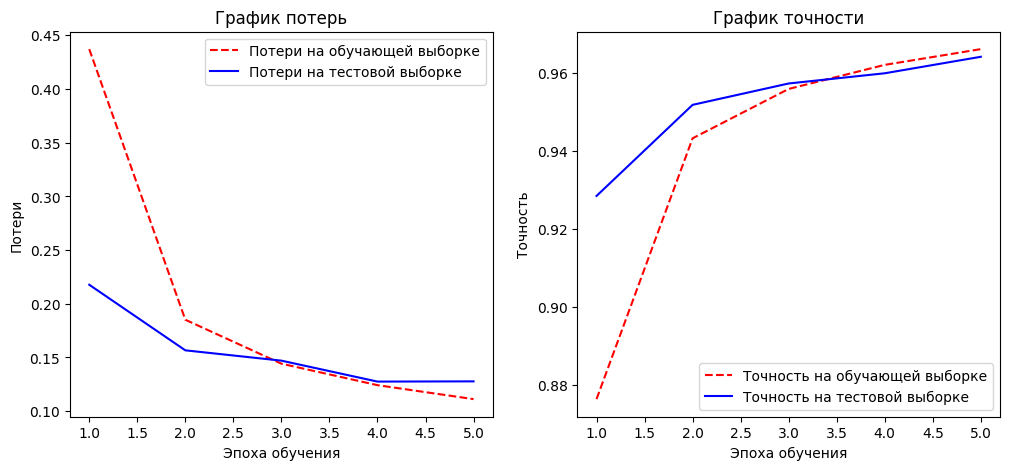

Лучшее значение потерь на обучающей выборке: 0.111
Лучшее значение валидационных потерь: 0.128
Лучшая точность на обучающей выборке: 96.874%
Лучшая точность на валидационных данных: 96.464%


In [ ]:
history_dict_moreL = history_moreL.history

# Получаем значения потерь и валидационных потерь
loss = history_dict_moreL['loss']
val_loss = history_dict_moreL['val_loss']
acc = history_dict_moreL['accuracy']
val_acc = history_dict_moreL['val_accuracy']
epochs = range(1, len(loss) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(epochs, loss, '--', label='Потери на обучающей выборке', color='r')
ax[0].plot(epochs, val_loss, 'b', label='Потери на тестовой выборке')
ax[0].set_title('График потерь')
ax[0].set_xlabel('Эпоха обучения')
ax[0].set_ylabel('Потери')
ax[0].legend()

ax[1].plot(epochs, acc, '--', label='Точность на обучающей выборке', color='r')
ax[1].plot(epochs, val_acc, 'b', label='Точность на тестовой выборке')
ax[1].set_title('График точности')
ax[1].set_xlabel('Эпоха обучения')
ax[1].set_ylabel('Точность')
ax[1].legend()

plt.show()

# Находим лучшее значение потерь на обучающей выборке
best_loss = min(loss)
best_epoch_loss = loss.index(best_loss) + 1  # +1, чтобы учесть индексацию

# Находим лучшее значение валидационных потерь
best_val_loss = min(val_loss)
best_epoch_val_loss = val_loss.index(best_val_loss) + 1  # +1, чтобы учесть индексацию

# Находим лучшее значение потерь на обучающей выборке
best_acc = max(acc)
best_epoch_acc = acc.index(best_acc) + 1  # +1, чтобы учесть индексацию

# Находим лучшее значение валидационных потерь
best_val_acc = max(val_acc)
best_epoch_val_acc = val_acc.index(best_val_acc) + 1  # +1, чтобы учесть индексацию

# Вывод результатов
print(f'Лучшее значение потерь на обучающей выборке: {best_loss:.3f}')
print(f'Лучшее значение валидационных потерь: {best_val_loss:.3f}')
print(f'Лучшая точность на обучающей выборке: {best_acc*100:.3f}%')
print(f'Лучшая точность на валидационных данных: {best_val_acc*100:.3f}%')

Добавили слой 64 нейрона, пока результат отличается на доли процента.


##Увеличим количество нейронов в базовой модели

In [ ]:
def build_model_moreN():
    model = models.Sequential()
    model.add(Input(shape=(28*28,)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(26, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model_moreN = build_model_moreN()

In [ ]:
history_moreN = model_moreN.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

Epoch 1/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8368 - loss: 0.6044 - val_accuracy: 0.9492 - val_loss: 0.1840
Epoch 2/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9583 - loss: 0.1487 - val_accuracy: 0.9669 - val_loss: 0.1208
Epoch 3/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9699 - loss: 0.1074 - val_accuracy: 0.9698 - val_loss: 0.1117
Epoch 4/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9754 - loss: 0.0863 - val_accuracy: 0.9709 - val_loss: 0.1049
Epoch 5/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9788 - loss: 0.0747 - val_accuracy: 0.9767 - val_loss: 0.0884


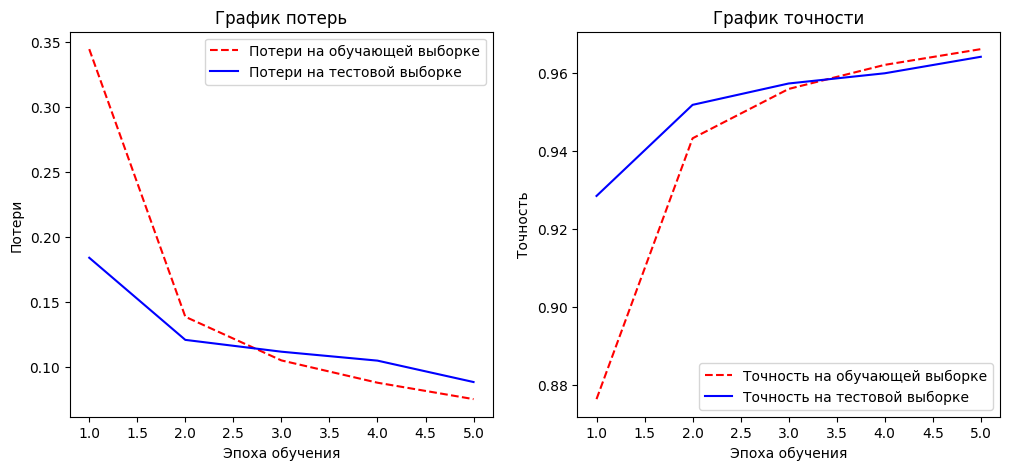

Лучшее значение потерь на обучающей выборке: 0.075
Лучшее значение валидационных потерь: 0.088
Лучшая точность на обучающей выборке: 97.875%
Лучшая точность на валидационных данных: 97.665%


In [ ]:
history_dict_moreN = history_moreN.history

# Получаем значения потерь и валидационных потерь
loss = history_dict_moreN['loss']
val_loss = history_dict_moreN['val_loss']
acc = history_dict_moreN['accuracy']
val_acc = history_dict_moreN['val_accuracy']
epochs = range(1, len(loss) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(epochs, loss, '--', label='Потери на обучающей выборке', color='r')
ax[0].plot(epochs, val_loss, 'b', label='Потери на тестовой выборке')
ax[0].set_title('График потерь')
ax[0].set_xlabel('Эпоха обучения')
ax[0].set_ylabel('Потери')
ax[0].legend()

ax[1].plot(epochs, acc, '--', label='Точность на обучающей выборке', color='r')
ax[1].plot(epochs, val_acc, 'b', label='Точность на тестовой выборке')
ax[1].set_title('График точности')
ax[1].set_xlabel('Эпоха обучения')
ax[1].set_ylabel('Точность')
ax[1].legend()

plt.show()



# Находим лучшее значение потерь на обучающей выборке
best_loss = min(loss)
best_epoch_loss = loss.index(best_loss) + 1  # +1, чтобы учесть индексацию

# Находим лучшее значение валидационных потерь
best_val_loss = min(val_loss)
#best_epoch_val_loss = val_loss_values.index(best_val_loss) + 1  # +1, чтобы учесть индексацию

# Находим лучшее значение потерь на обучающей выборке
best_acc = max(acc)
best_epoch_acc = acc.index(best_acc) + 1  # +1, чтобы учесть индексацию

# Находим лучшее значение валидационных потерь
best_val_acc = max(val_acc)
best_epoch_val_acc = val_acc.index(best_val_acc) + 1  # +1, чтобы учесть индексацию

# Вывод результатов
print(f'Лучшее значение потерь на обучающей выборке: {best_loss:.3f}')
print(f'Лучшее значение валидационных потерь: {best_val_loss:.3f}')
print(f'Лучшая точность на обучающей выборке: {best_acc*100:.3f}%')
print(f'Лучшая точность на валидационных данных: {best_val_acc*100:.3f}%')

Отлично, теперь точность заметно возросла и достигла почти 98% на валидационных данных

##Комбинированный подход

In [ ]:
def build_model_comb():
    model = models.Sequential()
    model.add(Input(shape=(28*28,)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(26, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model_comb = build_model_comb()

In [ ]:
history_comb = model_comb.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

Epoch 1/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8046 - loss: 0.7180 - val_accuracy: 0.9523 - val_loss: 0.1732
Epoch 2/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9560 - loss: 0.1567 - val_accuracy: 0.9613 - val_loss: 0.1371
Epoch 3/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9676 - loss: 0.1143 - val_accuracy: 0.9694 - val_loss: 0.1078
Epoch 4/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9734 - loss: 0.0932 - val_accuracy: 0.9705 - val_loss: 0.1070
Epoch 5/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9774 - loss: 0.0797 - val_accuracy: 0.9728 - val_loss: 0.0976


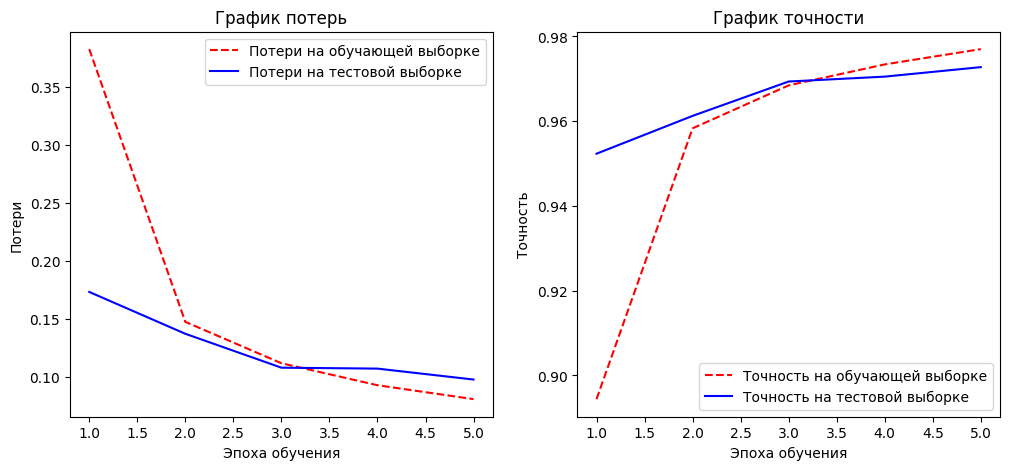

Лучшее значение потерь на обучающей выборке: 0.081 на эпохе 5
Лучшее значение валидационных потерь: 0.098 на эпохе 5
Лучшая точность на обучающей выборке: 97.701% на эпохе 5
Лучшая точность на валидационных данных: 97.276% на эпохе 5


In [ ]:
history_dict_comb = history_comb.history
# Получаем значения потерь и валидационных потерь
loss = history_dict_comb['loss']
val_loss = history_dict_comb['val_loss']
acc = history_dict_comb['accuracy']
val_acc = history_dict_comb['val_accuracy']
epochs = range(1, len(loss) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(epochs, loss, '--', label='Потери на обучающей выборке', color='r')
ax[0].plot(epochs, val_loss, 'b', label='Потери на тестовой выборке')
ax[0].set_title('График потерь')
ax[0].set_xlabel('Эпоха обучения')
ax[0].set_ylabel('Потери')
ax[0].legend()

ax[1].plot(epochs, acc, '--', label='Точность на обучающей выборке', color='r')
ax[1].plot(epochs, val_acc, 'b', label='Точность на тестовой выборке')
ax[1].set_title('График точности')
ax[1].set_xlabel('Эпоха обучения')
ax[1].set_ylabel('Точность')
ax[1].legend()

plt.show()

# Находим лучшее значение потерь на обучающей выборке
best_loss = min(loss)
best_epoch_loss = loss.index(best_loss) + 1  # +1, чтобы учесть индексацию

# Находим лучшее значение валидационных потерь
best_val_loss = min(val_loss)
best_epoch_val_loss = val_loss.index(best_val_loss) + 1  # +1, чтобы учесть индексацию

# Находим лучшее значение потерь на обучающей выборке
best_acc = max(acc)
best_epoch_acc = acc.index(best_acc) + 1  # +1, чтобы учесть индексацию

# Находим лучшее значение валидационных потерь
best_val_acc = max(val_acc)
best_epoch_val_acc = val_acc.index(best_val_acc) + 1  # +1, чтобы учесть индексацию

# Вывод результатов
print(f'Лучшее значение потерь на обучающей выборке: {best_loss:.3f} на эпохе {best_epoch_loss}')
print(f'Лучшее значение валидационных потерь: {best_val_loss:.3f} на эпохе {best_epoch_val_loss}')
print(f'Лучшая точность на обучающей выборке: {best_acc*100:.3f}% на эпохе {best_epoch_acc}')
print(f'Лучшая точность на валидационных данных: {best_val_acc*100:.3f}% на эпохе {best_epoch_val_acc}')

Видим, что в этот раз модель показывает точность ниже.

##Попробуем поменять параметры обучения нашей лучшей модели

In [ ]:
def build_model_moreN_adam():
    model = models.Sequential()
    model.add(Input(shape=(28*28,)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(26, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model_moreN_adam = build_model_moreN_adam()

In [ ]:
history_moreN_adam = model_moreN_adam.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=256)

Epoch 1/10
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7936 - loss: 0.7698 - val_accuracy: 0.9444 - val_loss: 0.2050
Epoch 2/10
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9506 - loss: 0.1793 - val_accuracy: 0.9595 - val_loss: 0.1477
Epoch 3/10
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9646 - loss: 0.1280 - val_accuracy: 0.9655 - val_loss: 0.1243
Epoch 4/10
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9709 - loss: 0.1034 - val_accuracy: 0.9705 - val_loss: 0.1081
Epoch 5/10
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9752 - loss: 0.0869 - val_accuracy: 0.9701 - val_loss: 0.1043
Epoch 6/10
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9781 - loss: 0.0771 - val_accuracy: 0.9747 - val_loss: 0.0915
Epoch 7/10
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9804 - loss: 0.0674 - val_accuracy: 0.9767 - val_loss: 0.0858
Epoch 8/10
1164/1164 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9826 - loss: 0.0596 

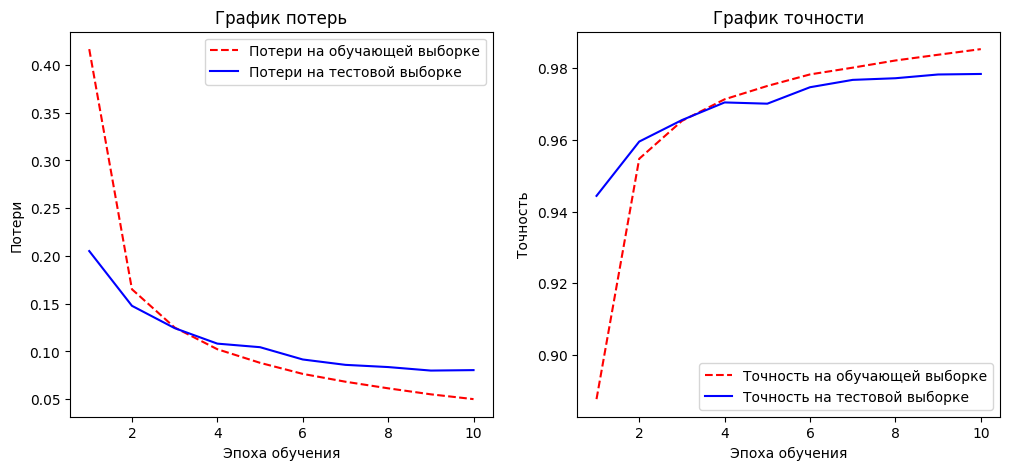

Лучшее значение потерь на обучающей выборке: 0.050 на эпохе 10
Лучшее значение валидационных потерь: 0.080 на эпохе 9
Лучшая точность на обучающей выборке: 98.533% на эпохе 10
Лучшая точность на валидационных данных: 97.840% на эпохе 10


In [ ]:
history_dict_moreN_adam = history_moreN_adam.history
# Получаем значения потерь и валидационных потерь
loss = history_dict_moreN_adam['loss']
val_loss = history_dict_moreN_adam['val_loss']
acc = history_dict_moreN_adam['accuracy']
val_acc = history_dict_moreN_adam['val_accuracy']
epochs = range(1, len(loss) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(epochs, loss, '--', label='Потери на обучающей выборке', color='r')
ax[0].plot(epochs, val_loss, 'b', label='Потери на тестовой выборке')
ax[0].set_title('График потерь')
ax[0].set_xlabel('Эпоха обучения')
ax[0].set_ylabel('Потери')
ax[0].legend()

ax[1].plot(epochs, acc, '--', label='Точность на обучающей выборке', color='r')
ax[1].plot(epochs, val_acc, 'b', label='Точность на тестовой выборке')
ax[1].set_title('График точности')
ax[1].set_xlabel('Эпоха обучения')
ax[1].set_ylabel('Точность')
ax[1].legend()

plt.show()

# Находим лучшее значение потерь на обучающей выборке
best_loss = min(loss)
best_epoch_loss = loss.index(best_loss) + 1  # +1, чтобы учесть индексацию

# Находим лучшее значение валидационных потерь
best_val_loss = min(val_loss)
best_epoch_val_loss = val_loss.index(best_val_loss) + 1  # +1, чтобы учесть индексацию

# Находим лучшее значение потерь на обучающей выборке
best_acc = max(acc)
best_epoch_acc = acc.index(best_acc) + 1  # +1, чтобы учесть индексацию

# Находим лучшее значение валидационных потерь
best_val_acc = max(val_acc)
best_epoch_val_acc = val_acc.index(best_val_acc) + 1  # +1, чтобы учесть индексацию

# Вывод результатов
print(f'Лучшее значение потерь на обучающей выборке: {best_loss:.3f} на эпохе {best_epoch_loss}')
print(f'Лучшее значение валидационных потерь: {best_val_loss:.3f} на эпохе {best_epoch_val_loss}')
print(f'Лучшая точность на обучающей выборке: {best_acc*100:.3f}% на эпохе {best_epoch_acc}')
print(f'Лучшая точность на валидационных данных: {best_val_acc*100:.3f}% на эпохе {best_epoch_val_acc}')

На оптимизаторе Adam, с 10 эпохами обучения на пакетах в 256 наша модель выдала 97,84% точности на валидационных данных и достигает точки, где она практически перестает обучаться.

Попробуем еще раз с другими параметрами.

In [ ]:
def build_model_moreN_rmsprop():
    model = models.Sequential()
    model.add(Input(shape=(28*28,)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(26, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model_moreN_rmsprop = build_model_moreN_rmsprop()

In [ ]:
history_dict_moreN_rmsprop = model_moreN_rmsprop.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15, batch_size=128)

Epoch 1/15
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8386 - loss: 0.5926 - val_accuracy: 0.9562 - val_loss: 0.1590
Epoch 2/15
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9589 - loss: 0.1465 - val_accuracy: 0.9662 - val_loss: 0.1239
Epoch 3/15
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9705 - loss: 0.1077 - val_accuracy: 0.9719 - val_loss: 0.1042
Epoch 4/15
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9751 - loss: 0.0877 - val_accuracy: 0.9733 - val_loss: 0.1003
Epoch 5/15
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9791 - loss: 0.0745 - val_accuracy: 0.9761 - val_loss: 0.0916
Epoch 6/15
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9810 - loss: 0.0668 - val_accuracy: 0.9755 - val_loss: 0.0929
Epoch 7/15
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9832 - loss: 0.0595 - val_accuracy: 0.9749 - val_loss: 0.0995
Epoch 8/15
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9845 - loss: 0.0

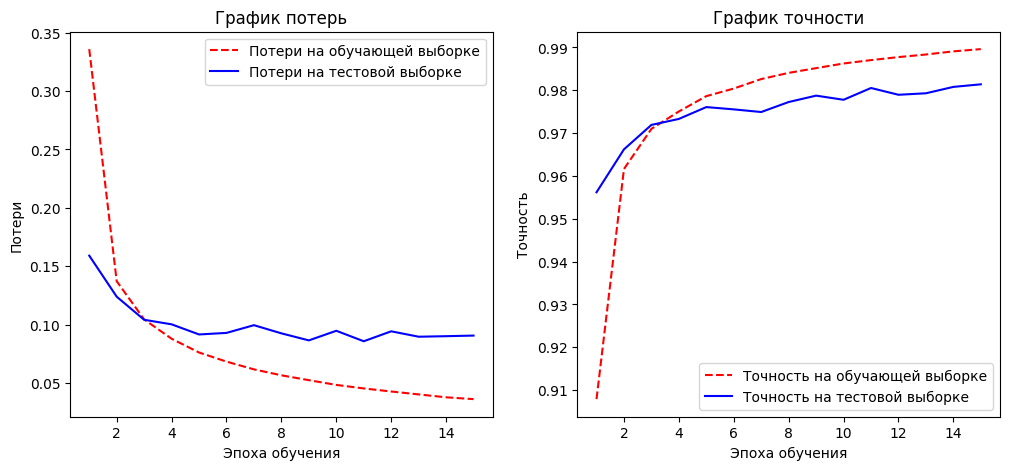

Лучшее значение потерь на обучающей выборке: 0.036 на эпохе 15
Лучшее значение валидационных потерь: 0.086 на эпохе 11
Лучшая точность на обучающей выборке: 98.961% на эпохе 15
Лучшая точность на валидационных данных: 98.139% на эпохе 15


In [ ]:
history_dict_moreN_rmsprop = history_dict_moreN_rmsprop.history
# Получаем значения потерь и валидационных потерь
loss = history_dict_moreN_rmsprop['loss']
val_loss = history_dict_moreN_rmsprop['val_loss']
acc = history_dict_moreN_rmsprop['accuracy']
val_acc = history_dict_moreN_rmsprop['val_accuracy']
epochs = range(1, len(loss) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(epochs, loss, '--', label='Потери на обучающей выборке', color='r')
ax[0].plot(epochs, val_loss, 'b', label='Потери на тестовой выборке')
ax[0].set_title('График потерь')
ax[0].set_xlabel('Эпоха обучения')
ax[0].set_ylabel('Потери')
ax[0].legend()

ax[1].plot(epochs, acc, '--', label='Точность на обучающей выборке', color='r')
ax[1].plot(epochs, val_acc, 'b', label='Точность на тестовой выборке')
ax[1].set_title('График точности')
ax[1].set_xlabel('Эпоха обучения')
ax[1].set_ylabel('Точность')
ax[1].legend()

plt.show()

# Находим лучшее значение потерь на обучающей выборке
best_loss = min(loss)
best_epoch_loss = loss.index(best_loss) + 1  # +1, чтобы учесть индексацию

# Находим лучшее значение валидационных потерь
best_val_loss = min(val_loss)
best_epoch_val_loss = val_loss.index(best_val_loss) + 1  # +1, чтобы учесть индексацию

# Находим лучшее значение потерь на обучающей выборке
best_acc = max(acc)
best_epoch_acc = acc.index(best_acc) + 1  # +1, чтобы учесть индексацию

# Находим лучшее значение валидационных потерь
best_val_acc = max(val_acc)
best_epoch_val_acc = val_acc.index(best_val_acc) + 1  # +1, чтобы учесть индексацию

# Вывод результатов
print(f'Лучшее значение потерь на обучающей выборке: {best_loss:.3f} на эпохе {best_epoch_loss}')
print(f'Лучшее значение валидационных потерь: {best_val_loss:.3f} на эпохе {best_epoch_val_loss}')
print(f'Лучшая точность на обучающей выборке: {best_acc*100:.3f}% на эпохе {best_epoch_acc}')
print(f'Лучшая точность на валидационных данных: {best_val_acc*100:.3f}% на эпохе {best_epoch_val_acc}')

Сувеличением эпох обучение с оптимизатором RMSprop становится менее стабильным - показатели точности начинают скакать при достижении 97.7%, хотя должен отметить, что итоговое обучение показывает наилучший результат в проведенных экспериментах

#Заключение
Посмотрим графики полученных моlелей в сравнении

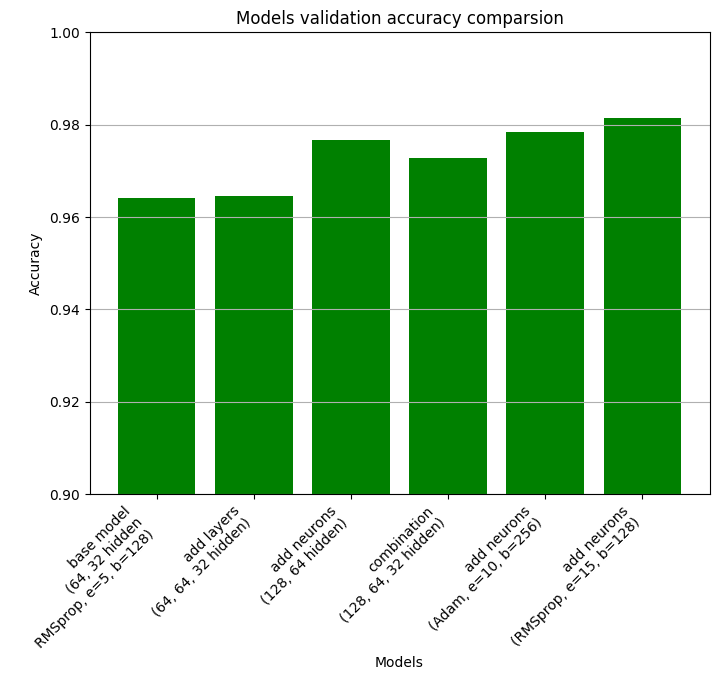

In [ ]:
#зададим словарь моделей и их историю
models = {
    'base model\n(64, 32 hidden\nRMSprop, e=5, b=128)': history_dict,
    'add layers\n(64, 64, 32 hidden)': history_dict_moreL,
    'add neurons\n(128, 64 hidden)': history_dict_moreN,
    'combination\n(128, 64, 32 hidden)': history_dict_comb,
    'add neurons\n(Adam, e=10, b=256)': history_dict_moreN_adam,
    'add neurons\n(RMSprop, e=15, b=128)': history_dict_moreN_rmsprop
}

best_accuracies = []

for model_name, history in models.items():
    best_accuracy = max(history['val_accuracy'])
    best_accuracies.append(best_accuracy)

plt.figure(figsize=(8, 6))
plt.bar(models.keys(), best_accuracies, color='g')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Models validation accuracy comparsion')
plt.ylim(0.90, 1)
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')

plt.show()

В итоге наша лучшая модель `model_moreN_rmsprop` имеет 128 и 64 нейрона во внутренних слоях, использует RMSprom оптимизатор и обучается на 15 эпохах пакетами размером 128, и имеет точность 98.139% на валидационных данных. Хотя оптимизатор Adam показался мне более стабильным, при незначительном проигрыше в точности в данном случае

Проверим на примере

In [ ]:
input = x_test[552].reshape(1,-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction: C


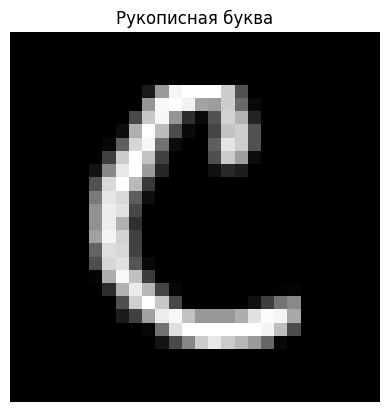

In [ ]:
prediction = model_moreN_rmsprop.predict(input)
prediction_class = np.argmax(prediction, axis=1)
print('Prediction:', word_dict[prediction_class[0]])

x = x_test[552]
x = x.reshape((28, 28))
plt.imshow(x, cmap='gray')
plt.axis('off')
plt.title('Рукописная буква')
plt.show()